# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
<i>It is important to be able to create an accurate model of emotional-facial recognition as they can be useful in detecting mental disorders or the reaction of individuals to Artifical Intellegence (AI) assistance. </i><br><hr>

**The objectives:** What is the intended goal?<br>
<i>The objective of this project is to find the most accurate model in order to detect 1 of 4 emotions given digital images of people. </i><br><hr>

**The key questions:** What are the key questions that need to be answered?<br>
<i>

1.   Can AI accurate determine the emotion being expressed by a human face in a digtal image?
2.   Which model gives the best results (i.e., the most accurate results) when processing images?

</i><br><hr>


**The problem formulation:** What are we trying to solve using data science?<br>
<i>
We are trying to solve which machine learning (ML) model is the most accurate in processing emotional images and if this concept is feasible for a larger implementation in either the business, medical field or beyond.

</i><br><hr>

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mount the Google drive
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries of image recognition
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Load and unzip the data

!unzip "/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images.zip" -d "/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images"

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/Facial_emotion_images/train/surprise/9879.jpg  
 extracting: /content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/Facial_emotion_images/train/surprise/9880.jpg  
 extracting: /content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/Facial_emotion_images/train/surprise/9882.jpg  
 extracting: /content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/Facial_emotion_images/train/surprise/9887.jpg  
 extracting: /content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/Facial_emotion_images/train/surprise/9894.jpg  
 extracting: /content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/Facial_emotion_images/train/surprise/9908.jpg  
 extracting: /content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/Facial_emotion_images/tr

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

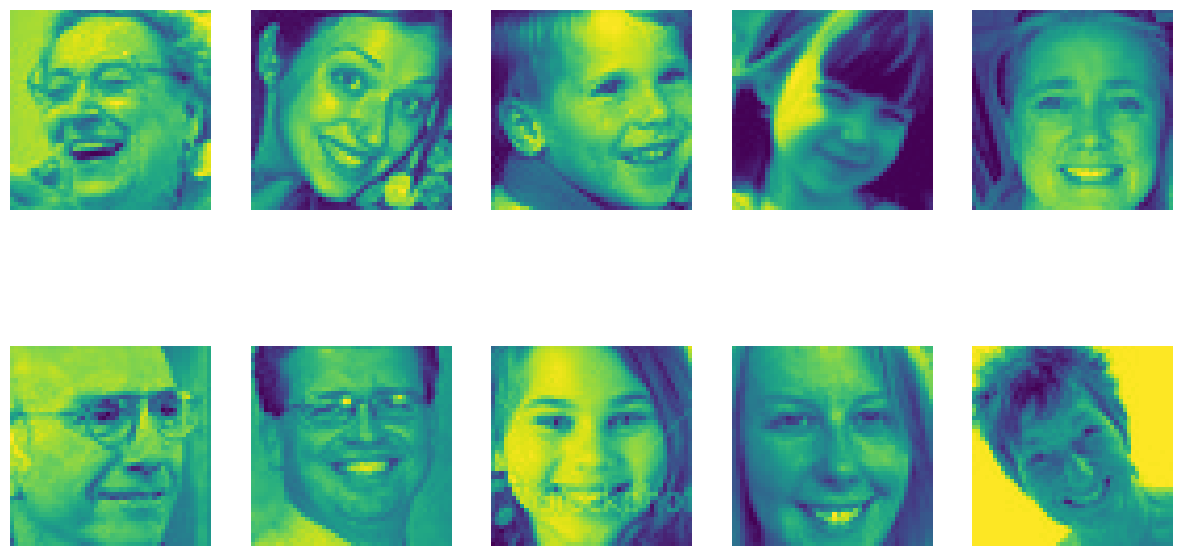

In [ ]:
# Showing the first 10 images of the happy folder

import matplotlib.pyplot as plt
import os


image_folder = '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train/happy'

image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Display the first 10 images
plt.figure(figsize=(15, 8))
for i in range(10):
    image_path = os.path.join(image_folder, image_files[i])
    img = plt.imread(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

**Observations and Insights:**<br>
With the happy images, there is a habit to show teeth when smiling. Eyebrows tend to be arched and cheecks create a crease from the nose to the corner of the mouth. Being this is the first set being examines, an observation is that some images have watermarks.

### **Sad**

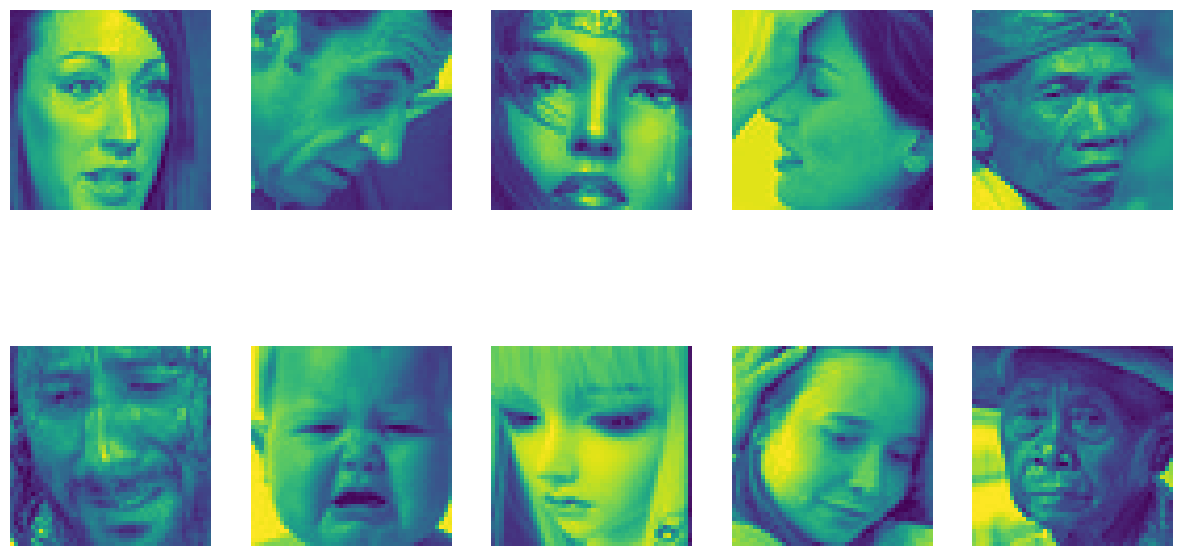

In [ ]:
# Showing the first 10 images of the sad folder

import matplotlib.pyplot as plt
import os


image_folder = '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train/sad'

image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Display the first 10 images
plt.figure(figsize=(15, 8))
for i in range(10):
    image_path = os.path.join(image_folder, image_files[i])
    img = plt.imread(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

**Observations and Insights:**  <br>
With the sad images, there is a habit not to show teeth when sad.  Some images have a downturned expression especially around the lips. Sad images could have tears.  The eyes are not wide and in some images the eyelids are lowered but not closed.  Eyebrows tend to be furrowed.

### **Neutral**

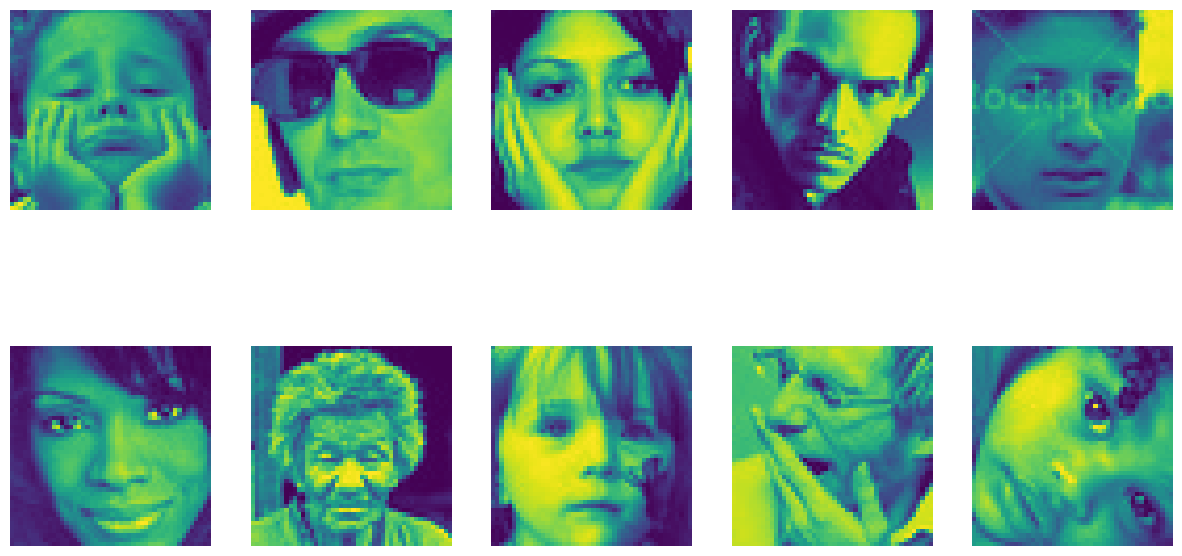

In [ ]:
# Showing the first 10 images of the neutral folder

import matplotlib.pyplot as plt
import os


image_folder = '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train/neutral'

image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Display the first 10 images
plt.figure(figsize=(15, 8))
for i in range(10):
    image_path = os.path.join(image_folder, image_files[i])
    img = plt.imread(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

**Observations and Insights:**
<br>
With the neutral images, there is a habit in some examples to have hands on the face.  The lips are in a more balanced position, neither upturn or downturned. the eyes gaze forward and the eyebrows are relaxed.

### **Surprised**

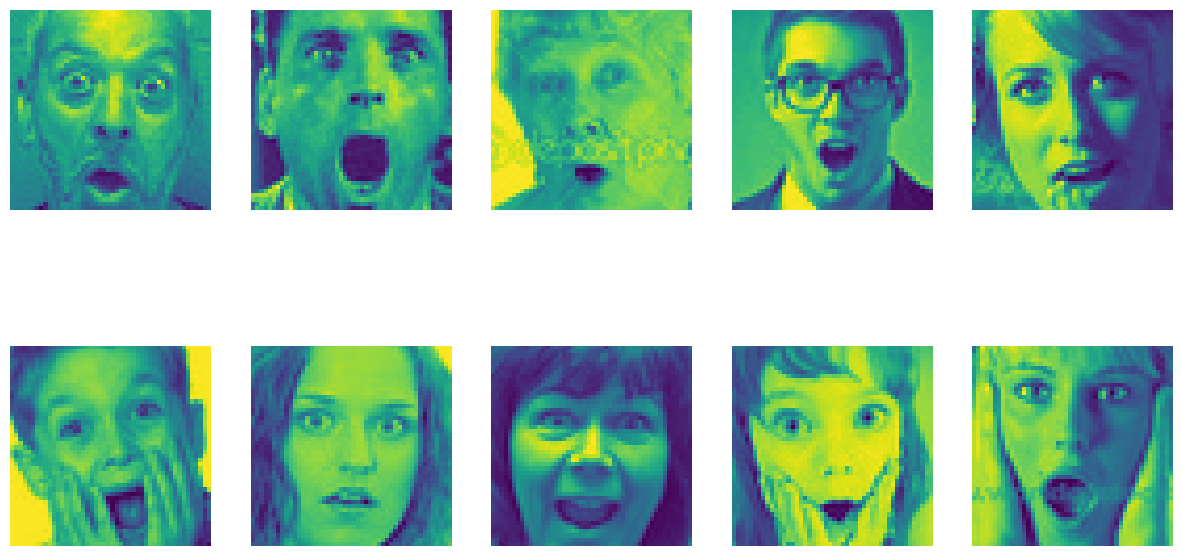

In [ ]:
# Showing the first 10 images of the surprise folder

import matplotlib.pyplot as plt
import os


image_folder = '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train/surprise'

image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Display the first 10 images
plt.figure(figsize=(15, 8))
for i in range(10):
    image_path = os.path.join(image_folder, image_files[i])
    img = plt.imread(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

**Observations and Insights:**<br>
With the suprised images, there is a habit to have the mouth open, but not showing teeth, eyes are wide open and periodically there are hands on the face. Eyebrows are arched. Because the mouth is open wide in most cases the nostrils are more prevelent.  

## **Checking Distribution of Classes**

{'happy': 3976, 'neutral': 3978, 'sad': 3982, 'surprise': 3173}


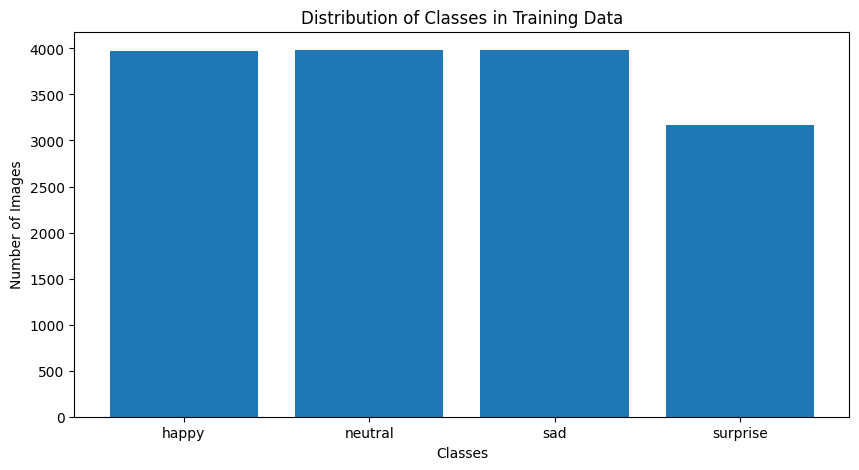

In [ ]:
#Check Distribution of Classes

import os

train_dir = '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train'
class_counts = {}

for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

print(class_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Training Data')
plt.show()

**Observations and Insights:** <br>
The number of happy, neutral and sad images is the same with surprise having fewer images than the other 3 categories.

**Think About It:**
* Are the classes equally distributed? <br>
<i> No, the classes are not equally distributed as surprised has less images than the other 3 classes</i>
<br>

If not, do you think the imbalance is too high?<br>
<i>No I do not think the imbalance is too high. </i> <br>


Will it be a problem as we progress?<br>
<i>I do not think this will be a problem as we progress</i><br>

* Are there any Exploratory Data Analysis tasks that we can do here? <br>
<i>We could look at the dimensions of the datasets and drop a random number of images from the 3 higher datasets in order to have an even number of images for all 4 classes</i><br>
<i> PCA and/or t-SNE can be used to analyze the dimensionality of the data.</i><br>


Would they provide any meaningful insights?<br>
<i> no, dropping random number of images does not give us any meaningful insights; however, PCA and t-SNE would be better to gain meaningful insights.</i>

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
# Creating data loaders

IMG_WIDTH = 48
IMG_HEIGHT = 48
image_size = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 64
#color_mode = 'grayscale'
color_mode = 'rgb'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical'
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/validation',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/test',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical',
    shuffle=False
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [ ]:
# Create a convolutional neural network

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3 if color_mode == 'rgb' else 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(4, activation='softmax') # Output layer with 4 classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,036 (1.36 MB)

 Trainable params: 356,036 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### **Compiling and Training the Model**

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,036 (1.36 MB)

 Trainable params: 356,036 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 834,538 (3.18 MB)

 Trainable params: 834,474 (3.18 MB)

 Non-trainable params: 64 (256.00 B)

None
Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1332s 5s/step - accuracy: 0.2940 - loss: 1.3666 - val_accuracy: 0.5045 - val_loss: 1.1543
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 246s 982ms/step - accuracy: 0.4801 - loss: 1.1653 - val_accuracy: 0.5719 - val_loss: 1.0108
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.5560 - loss: 1.0229 - val_accuracy: 0.6031 - val_loss: 0.9339
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.6022 - loss: 0.9458 - val_accuracy: 0.6231 - val_loss: 0.8864
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 237s 990ms/step - accuracy: 0.6206 - loss: 0.9291 - val_accuracy: 0.6490 - val_loss: 0.8400
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 262s 990ms/step - accuracy: 0.6319 - loss: 0.8838 - val_accuracy: 0.6719 - val_loss: 0.8030
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 260s 983ms/step - accuracy: 0.6475 - loss: 0.8514 - val_accuracy: 0.6767 - val_loss: 0.7869
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.6538 - loss:

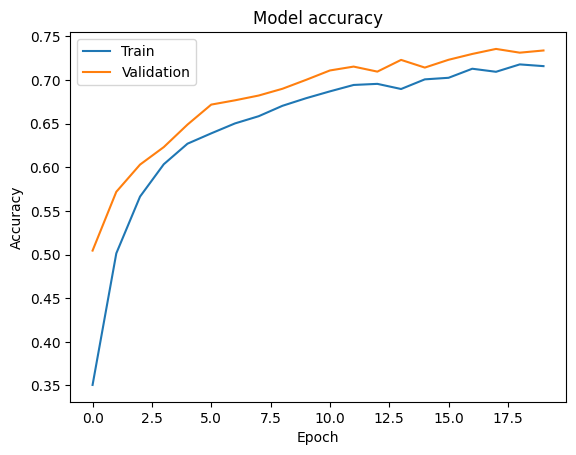

In [ ]:
# Compiling and Training the Model

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3 if color_mode == 'rgb' else 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(4, activation='softmax') # Output layer with 4 classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


#model_1 = model()
print(model_1.summary())

history_1 = model.fit(train_generator, validation_data=train_generator, batch_size=128, verbose=1, epochs=20)
# Plot the training and validation accuracies
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluating the Model on the Test Set

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

2/2 - 1s - 334ms/step - accuracy: 0.7266 - loss: 0.6381

Test accuracy: 0.7265625
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.59      0.81      0.68        32
           2       0.60      0.38      0.46        32
           3       0.94      0.91      0.92        32

    accuracy                           0.73       128
   macro avg       0.73      0.73      0.72       128
weighted avg       0.73      0.73      0.72       128

[[26  1  3  2]
 [ 1 26  5  0]
 [ 4 16 12  0]
 [ 2  1  0 29]]


**Observations and Insights:__**<br>
<i> The training data and the validation data are in similar curves which make them a good fit. As they increase over time, it is confirmation that that model is learning. The graph, two convergening curves, indicate the model is not overfitted.  We have an accuracy of about 73%, stabilizing after about 10 epochs.This model would not benefit from more epochs but from fine tuning the parameters.</i>

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Define the CNN model2
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3 if color_mode == 'rgb' else 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(4, activation='softmax') # Output layer with 4 classes and softmax activation
])

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 46, 46, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,420,676 (5.42 MB)

 Trainable params: 1,420,676 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

### **Compiling and Training the Model**

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 46, 46, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,420,676 (5.42 MB)

 Trainable params: 1,420,676 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 46, 46, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,420,676 (5.42 MB)

 Trainable params: 1,420,676 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.7225 - loss: 0.6854 - val_accuracy: 0.7496 - val_loss: 0.6261
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.7199 - loss: 0.6900 - val_accuracy: 0.7495 - val_loss: 0.6271
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.7320 - loss: 0.6737 - val_accuracy: 0.7528 - val_loss: 0.6047
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.7280 - loss: 0.6545 - val_accuracy: 0.7549 - val_loss: 0.6007
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 283s 994ms/step - accuracy: 0.7264 - loss: 0.6649 - val_accuracy: 0.7541 - val_loss: 0.6035
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.7352 - loss: 0.6459 - val_accuracy: 0.7617 - val_loss: 0.5922
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 239s 999ms/step - accuracy: 0.7324 - loss: 0.6564 - val_accuracy: 0.7613 - val_loss: 0.6044
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 258s 985ms/step - accuracy: 0.7409 - loss: 0.6

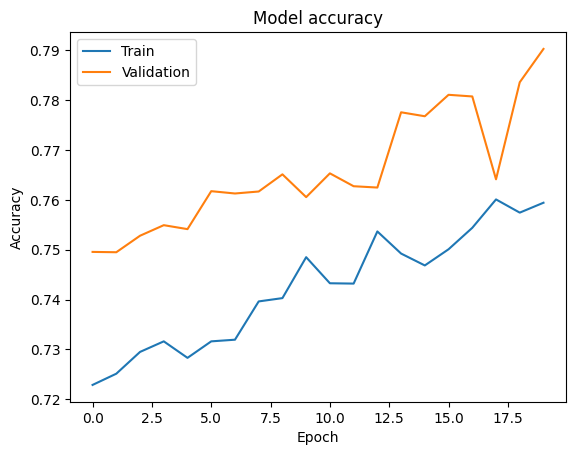

In [ ]:
# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model2.summary()


#model_1 = model()
print(model2.summary())

history_2 = model.fit(train_generator, validation_data=train_generator, batch_size=128, verbose=1, epochs=20)
# Plot the training and validation accuracies
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluating the Model on the Test Set

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions for the test set
y_pred = model2.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

2/2 - 1s - 352ms/step - accuracy: 0.7656 - loss: 0.5898

Test accuracy: 0.765625
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.17      0.03      0.05        32
           2       0.22      0.25      0.23        32
           3       0.26      0.69      0.38        32

    accuracy                           0.24       128
   macro avg       0.16      0.24      0.17       128
weighted avg       0.16      0.24      0.17       128

[[ 0  0 10 22]
 [ 1  1 10 20]
 [ 0  4  8 20]
 [ 0  1  9 22]]


**Observations and Insights:__**
<i> This model has an acuracy of ~76.56%.  While the models do curve to indicate there is some learning taking place, they are showing a great deal of noise.  The excess noise could be an indication of overfitting of the model.</i>

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
# data loaders that we will use as inputs to our Neural Network

import tensorflow as tf

IMG_WIDTH = 48
IMG_HEIGHT = 48
image_size = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 64
color_mode = 'rgb'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical'
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/validation',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/test',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
#Import the VGG16 Architecture

from tensorflow.keras.applications import VGG16

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# Load the pre-trained VGG16 model (excluding the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Freeze the layers of the base model (optional, but often recommended)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Example fully connected layer
x = Dense(128, activation='relu')(x) # Example fully connected layer
predictions = Dense(4, activation='softmax')(x) # Output layer with 4 classes and softmax activation


# Create the complete model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Print the model summary
model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,879,428 (56.76 MB)

 Trainable params: 164,740 (643.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### **Compiling and Training the VGG16 Model**

Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3370s 14s/step - accuracy: 0.4254 - loss: 1.2413 - val_accuracy: 0.5206 - val_loss: 1.0940
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 668s 3s/step - accuracy: 0.5047 - loss: 1.1281 - val_accuracy: 0.4888 - val_loss: 1.1450
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.5144 - loss: 1.1130 - val_accuracy: 0.5146 - val_loss: 1.1134
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.5222 - loss: 1.1007 - val_accuracy: 0.5136 - val_loss: 1.1117
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 618s 3s/step - accuracy: 0.5258 - loss: 1.0847 - val_accuracy: 0.5586 - val_loss: 1.0448
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 625s 3s/step - accuracy: 0.5479 - loss: 1.0550 - val_accuracy: 0.5353 - val_loss: 1.0660
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.5458 - loss: 1.0570 - val_accuracy: 0.5501 - val_loss: 1.0531
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.5541 - loss: 1.0446 - val_ac

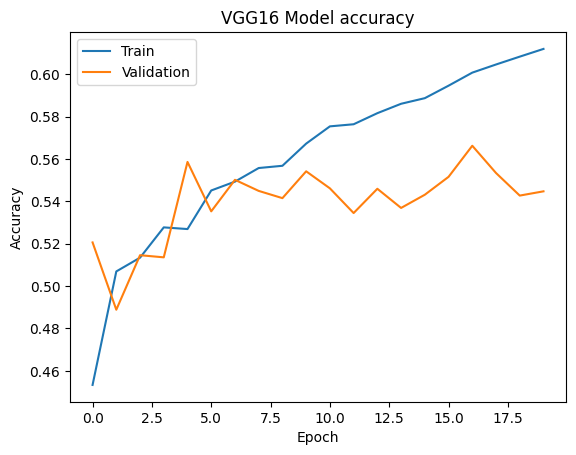

In [ ]:
# Compiling and Training the VGG16 Model

# Compile the model
model_vgg16.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=20,  # You can adjust the number of epochs
    validation_data=validation_generator
)

# Plot the training and validation accuracies
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the VGG16 model**

In [ ]:
# Evaluate the VGG16 model

# Evaluate the VGG16 model on the test set
test_loss_vgg16, test_acc_vgg16 = model_vgg16.evaluate(test_generator, verbose=2)
print('\nVGG16 Test accuracy:', test_acc_vgg16)

# Get predictions for the test set
y_pred_vgg16 = model_vgg16.predict(test_generator)
y_pred_classes_vgg16 = np.argmax(y_pred_vgg16, axis=1)
y_true_vgg16 = test_generator.classes

# Print classification report and confusion matrix for VGG16
print(classification_report(y_true_vgg16, y_pred_classes_vgg16))
print(confusion_matrix(y_true_vgg16, y_pred_classes_vgg16))

2/2 - 5s - 2s/step - accuracy: 0.5312 - loss: 1.0803

VGG16 Test accuracy: 0.53125
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
              precision    recall  f1-score   support

           0       0.50      0.62      0.56        32
           1       0.39      0.38      0.38        32
           2       0.57      0.41      0.47        32
           3       0.68      0.72      0.70        32

    accuracy                           0.53       128
   macro avg       0.53      0.53      0.53       128
weighted avg       0.53      0.53      0.53       128

[[20  6  2  4]
 [ 8 12  7  5]
 [ 9  8 13  2]
 [ 3  5  1 23]]


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**<br>
<i>The training data increases in accuracy over epochs. As the graph hasn't quite stabilized, it may benefit from additional epochs.  The validation data did not improve accuracy in the same way as the training data. The validation graph shows a great deal of noise.  This may indicate overfitting.     </i>

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Load the pre-trained ResNet50V2 model (excluding the top classification layers)
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Freeze the layers of the base model (optional, but often recommended)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x) # Use GlobalAveragePooling2D instead of Flatten
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the complete model
model_resnet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Print the model summary
model_resnet.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 48, 48, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 12, 12, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 12, 12, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 14, 14, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 24,122,756 (92.02 MB)

 Trainable params: 557,956 (2.13 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

### **Compiling and Training the Model**

Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 238s 958ms/step - accuracy: 0.4082 - loss: 1.3804 - val_accuracy: 0.4800 - val_loss: 1.1647
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.5016 - loss: 1.1493 - val_accuracy: 0.5357 - val_loss: 1.0999
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 227s 949ms/step - accuracy: 0.5127 - loss: 1.1131 - val_accuracy: 0.5234 - val_loss: 1.1020
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 259s 936ms/step - accuracy: 0.5279 - loss: 1.0874 - val_accuracy: 0.5423 - val_loss: 1.0681
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 226s 944ms/step - accuracy: 0.5444 - loss: 1.0614 - val_accuracy: 0.5266 - val_loss: 1.1159
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 226s 944ms/step - accuracy: 0.5563 - loss: 1.0376 - val_accuracy: 0.5429 - val_loss: 1.0837
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.5482 - loss: 1.0446 - val_accuracy: 0.5499 - val_loss: 1.0697
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.5634 - loss: 1.

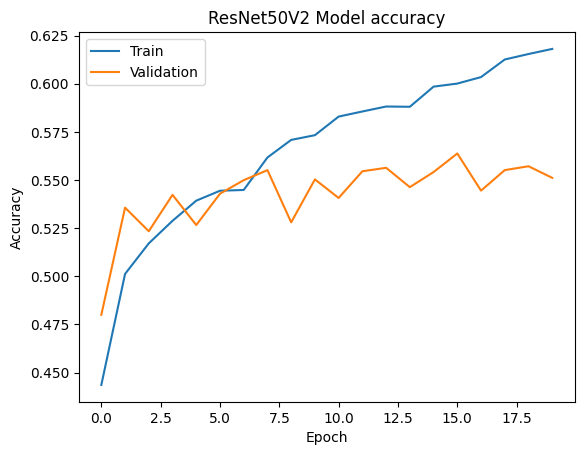

2/2 - 1s - 696ms/step - accuracy: 0.5547 - loss: 1.0395

ResNet50V2 Test accuracy: 0.5546875
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 791ms/step
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        32
           1       0.42      0.44      0.43        32
           2       0.45      0.41      0.43        32
           3       0.74      0.81      0.78        32

    accuracy                           0.55       128
   macro avg       0.55      0.55      0.55       128
weighted avg       0.55      0.55      0.55       128

[[18  6  6  2]
 [ 7 14  9  2]
 [ 4 10 13  5]
 [ 2  3  1 26]]


In [ ]:
# Compiling and Training the Model

# Compile the model
model_resnet.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(
    train_generator,
    epochs=20,  # You can adjust the number of epochs
    validation_data=validation_generator
)

# Plot the training and validation accuracies
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('ResNet50V2 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# ### **Evaluating the ResNet Model**
# Evaluate the ResNet Model

# Evaluate the ResNet model on the test set
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(test_generator, verbose=2)
print('\nResNet50V2 Test accuracy:', test_acc_resnet)

# Get predictions for the test set
y_pred_resnet = model_resnet.predict(test_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_true_resnet = test_generator.classes

# Print classification report and confusion matrix for ResNet
print(classification_report(y_true_resnet, y_pred_classes_resnet))
print(confusion_matrix(y_true_resnet, y_pred_classes_resnet))

### **Evaluating the ResNet Model**

In [ ]:
# Evaluating the ResNet Model

# Assuming model_resnet is already defined and trained as in the provided code.

# Evaluate the ResNet model on the test set
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(test_generator, verbose=2)
print('\nResNet50V2 Test accuracy:', test_acc_resnet)

# Get predictions for the test set
y_pred_resnet = model_resnet.predict(test_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_true_resnet = test_generator.classes

# Print classification report and confusion matrix for ResNet
print(classification_report(y_true_resnet, y_pred_classes_resnet))
print(confusion_matrix(y_true_resnet, y_pred_classes_resnet))

2/2 - 3s - 2s/step - accuracy: 0.5547 - loss: 1.0395

ResNet50V2 Test accuracy: 0.5546875
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        32
           1       0.42      0.44      0.43        32
           2       0.45      0.41      0.43        32
           3       0.74      0.81      0.78        32

    accuracy                           0.55       128
   macro avg       0.55      0.55      0.55       128
weighted avg       0.55      0.55      0.55       128

[[18  6  6  2]
 [ 7 14  9  2]
 [ 4 10 13  5]
 [ 2  3  1 26]]


**Observations and Insights:__**<br>
<i> The training model learned with an accuracy of ~55%.  The curve for training stablizes beyond the 20 epochs and may benefit from more epochs.  The validation data starts with a curve; however, more noise appears in the data and the high level of flucuations indicate this model is overfitted. This model may benefit from a longer training time. </i>

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

!pip install -U efficientnet

import efficientnet.tfkeras as efn
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the EfficientNetB0 model (you can change the B0 to other versions like B1, B2, etc.)
base_model = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x) # Assuming 4 output classes

# Create the complete model
model_efficientnet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_efficientnet.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Print the model summary
model_efficientnet.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00
16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 48, 48, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 24, 24, 32)     │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 24, 24, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 24, 24, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 24, 24, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 24, 24, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 24, 24, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand         │ (None, 1, 1, 32)       │            288 │ block1a_se_reduce[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_excite         │ (None, 24, 24, 32)     │              0 │ block1a_activation[0]… │
│ (Multiply)                │                        │                │ block1a_se_expand[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 24, 24, 16)     │            512 │ block1a_se_excite[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn   

 Total params: 4,378,528 (16.70 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 4,049,564 (15.45 MB)

### **Compiling and Training the Model**

Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 201s 743ms/step - accuracy: 0.4317 - loss: 1.2563 - val_accuracy: 0.5419 - val_loss: 1.0737
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 188s 683ms/step - accuracy: 0.5094 - loss: 1.1260 - val_accuracy: 0.5664 - val_loss: 1.0191
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 206s 703ms/step - accuracy: 0.5202 - loss: 1.1056 - val_accuracy: 0.5224 - val_loss: 1.0803
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 197s 681ms/step - accuracy: 0.5204 - loss: 1.0968 - val_accuracy: 0.5427 - val_loss: 1.0535
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 208s 706ms/step - accuracy: 0.5438 - loss: 1.0568 - val_accuracy: 0.5726 - val_loss: 0.9981
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 172s 714ms/step - accuracy: 0.5437 - loss: 1.0443 - val_accuracy: 0.5811 - val_loss: 0.9857
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 155s 641ms/step - accuracy: 0.5450 - loss: 1.0481 - val_accuracy: 0.5748 - val_loss: 0.9988
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 210s 676ms/step - accuracy: 0.5514 -

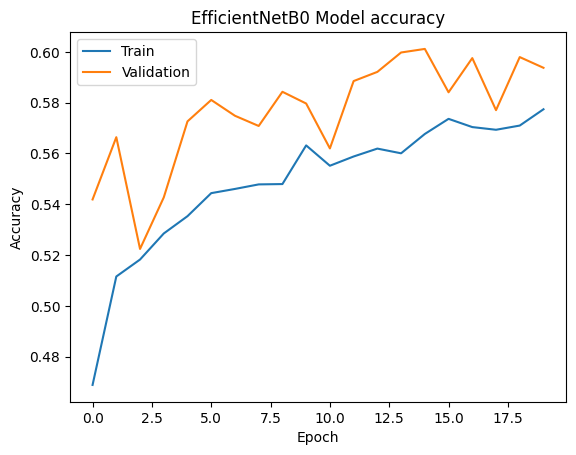

2/2 - 1s - 414ms/step - accuracy: 0.5312 - loss: 1.0103

EfficientNetB0 Test accuracy: 0.53125
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step
              precision    recall  f1-score   support

           0       0.47      0.72      0.57        32
           1       0.44      0.47      0.45        32
           2       0.53      0.25      0.34        32
           3       0.73      0.69      0.71        32

    accuracy                           0.53       128
   macro avg       0.54      0.53      0.52       128
weighted avg       0.54      0.53      0.52       128

[[23  4  2  3]
 [10 15  5  2]
 [10 11  8  3]
 [ 6  4  0 22]]


In [ ]:
# Compiling and Training the Model

# Compile the model
model_efficientnet.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Train the model
history_efficientnet = model_efficientnet.fit(
    train_generator,
    epochs=20,  # You can adjust the number of epochs
    validation_data=validation_generator
)

# Plot the training and validation accuracies
plt.plot(history_efficientnet.history['accuracy'])
plt.plot(history_efficientnet.history['val_accuracy'])
plt.title('EfficientNetB0 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# ### **Evaluating the EfficientNet Model**
# Evaluate the EfficientNet Model

# Evaluate the EfficientNet model on the test set
test_loss_efficientnet, test_acc_efficientnet = model_efficientnet.evaluate(test_generator, verbose=2)
print('\nEfficientNetB0 Test accuracy:', test_acc_efficientnet)

# Get predictions for the test set
y_pred_efficientnet = model_efficientnet.predict(test_generator)
y_pred_classes_efficientnet = np.argmax(y_pred_efficientnet, axis=1)
y_true_efficientnet = test_generator.classes

# Print classification report and confusion matrix for EfficientNet
print(classification_report(y_true_efficientnet, y_pred_classes_efficientnet))
print(confusion_matrix(y_true_efficientnet, y_pred_classes_efficientnet))

### **Evaluating the EfficientnetNet Model**

In [ ]:
# Evaluating the EfficientnetNet Model

# Evaluate the EfficientNet model on the test set
test_loss_efficientnet, test_acc_efficientnet = model_efficientnet.evaluate(test_generator, verbose=2)
print('\nEfficientNetB0 Test accuracy:', test_acc_efficientnet)

# Get predictions for the test set
y_pred_efficientnet = model_efficientnet.predict(test_generator)
y_pred_classes_efficientnet = np.argmax(y_pred_efficientnet, axis=1)
y_true_efficientnet = test_generator.classes

# Print classification report and confusion matrix for EfficientNet
print(classification_report(y_true_efficientnet, y_pred_classes_efficientnet))
print(confusion_matrix(y_true_efficientnet, y_pred_classes_efficientnet))

2/2 - 2s - 843ms/step - accuracy: 0.5312 - loss: 1.0103

EfficientNetB0 Test accuracy: 0.53125
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 984ms/step
              precision    recall  f1-score   support

           0       0.47      0.72      0.57        32
           1       0.44      0.47      0.45        32
           2       0.53      0.25      0.34        32
           3       0.73      0.69      0.71        32

    accuracy                           0.53       128
   macro avg       0.54      0.53      0.52       128
weighted avg       0.54      0.53      0.52       128

[[23  4  2  3]
 [10 15  5  2]
 [10 11  8  3]
 [ 6  4  0 22]]


**Observations and Insights:__**<br>
<i>The training model is learning according to the curve.  It just starts to even off as of epoch ~13-15.  However, there is a great deal of noise in the validation data.  This leads to a low accuracy. The imbalance of the original dataset may be affecting the accuracy.  This model could benefit from a more balanced data set with additional images on which to train.  </i>

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
# create data loaders which we will use as inputs to the more Complicated Convolutional Neural Network.

IMG_WIDTH = 48
IMG_HEIGHT = 48
image_size = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 64
color_mode = 'grayscale'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical'
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/validation',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/test',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
# build a layer with 5 Convolutional Blocks using 3d shape

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_conv_model(input_shape):
    model = Sequential()
    # 5 Convolutional Blocks
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    #model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    #model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    #model.add(MaxPooling2D((2, 2)))


    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(4, activation='softmax')) # Assuming 4 output classes

    return model



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_conv_model(input_shape):
    model = Sequential()
    # 5 Convolutional Blocks - Adjusted to avoid negative dimensions
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Removed extra MaxPooling layers to prevent negative dimensions
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Removed extra MaxPooling layers to prevent negative dimensions
    model.add(Conv2D(256, (3, 3), activation='relu'))
    # Removed extra MaxPooling layers to prevent negative dimensions


    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(4, activation='softmax')) # Assuming 4 output classes

    return model



### **Compiling and Training the Model**

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 46, 46, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 21, 21, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,492,036 (9.51 MB)

 Trainable params: 2,492,036 (9.51 MB)

 Non-trainable params: 0 (0.00 B)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 110s 446ms/step - accuracy: 0.2760 - loss: 1.3744 - val_accuracy: 0.4334 - val_loss: 1.2401
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 145s 459ms/step - accuracy: 0.4119 - loss: 1.2260 - val_accuracy: 0.5226 - val_loss: 1.0988
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 110s 458ms/step - accuracy: 0.5068 - loss: 1.0983 - val_accuracy: 0.5915 - val_loss: 0.9599
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 106s 442ms/step - accuracy: 0.5534 - loss: 1.0233 - val_accuracy: 0.5945 - val_loss: 0.9424
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 147s 462ms/step - accuracy: 0.5819 - loss: 0.9597 - val_accuracy: 0.6184 - val_loss: 0.9248
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 140s 453ms/step - accuracy: 0.5978 - loss: 0.9306 - val_accuracy: 0.6490 - val_loss: 0.8497
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 140s 442ms/step - accuracy: 0.6174 - loss:

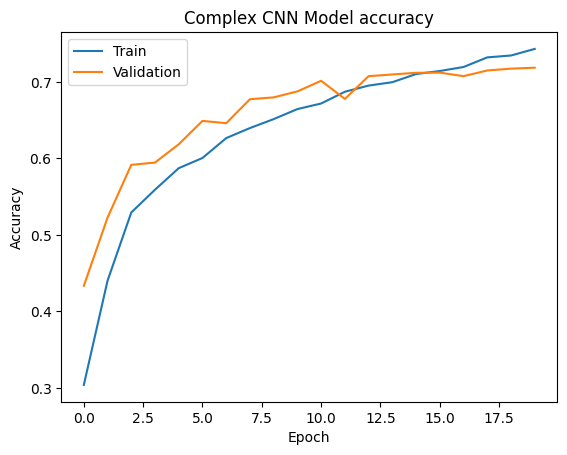

In [ ]:
# Compiling and Training the Model

# Example usage:
IMG_WIDTH = 48
IMG_HEIGHT = 48
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1) # Changed to 1 for grayscale
model_complex_cnn = build_conv_model(input_shape)
model_complex_cnn.summary()

# Compile the model
model_complex_cnn.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
# Ensure train_generator is defined before using it
import tensorflow as tf

IMG_WIDTH = 48
IMG_HEIGHT = 48
image_size = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 64
color_mode = 'grayscale'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/train',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical'
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/validation',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataScience/Assignments/Capstone/Facial_emotion_images/test',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    color_mode=color_mode,
    class_mode='categorical',
)
# Train the model
history_complex_cnn = model_complex_cnn.fit(
    train_generator,
    epochs=20,  # You can adjust the number of epochs
    validation_data=validation_generator
)

# Import matplotlib.pyplot before using plt
import matplotlib.pyplot as plt # Importing matplotlib.pyplot

# Plot the training and validation accuracies
plt.plot(history_complex_cnn.history['accuracy'])
plt.plot(history_complex_cnn.history['val_accuracy'])
plt.title('Complex CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



### **Evaluating the Model on Test Set**

In [ ]:
#Evaluating the Model on Test Set

# Evaluate the complex model on the test set
test_loss_complex, test_acc_complex = model_complex_cnn.evaluate(test_generator, verbose=2)
print('\nComplex Model Test accuracy:', test_acc_complex)

# Get predictions for the test set
y_pred_complex = model_complex_cnn.predict(test_generator)
y_pred_classes_complex = np.argmax(y_pred_complex, axis=1)
y_true_complex = test_generator.classes

# Print classification report and confusion matrix for the complex model
print(classification_report(y_true_complex, y_pred_classes_complex))
print(confusion_matrix(y_true_complex, y_pred_classes_complex))

2/2 - 1s - 257ms/step - accuracy: 0.7188 - loss: 0.6590

Complex Model Test accuracy: 0.71875
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
              precision    recall  f1-score   support

           0       0.32      0.31      0.32        32
           1       0.24      0.31      0.27        32
           2       0.25      0.22      0.23        32
           3       0.33      0.28      0.31        32

    accuracy                           0.28       128
   macro avg       0.29      0.28      0.28       128
weighted avg       0.29      0.28      0.28       128

[[10  9  8  5]
 [ 5 10  9  8]
 [ 9 11  7  5]
 [ 7 12  4  9]]


**Observations and Insights:__**<br>
<i> The accuracy for the test set is ~72%.  </i>

### **Plotting the Confusion Matrix for the chosen final model**

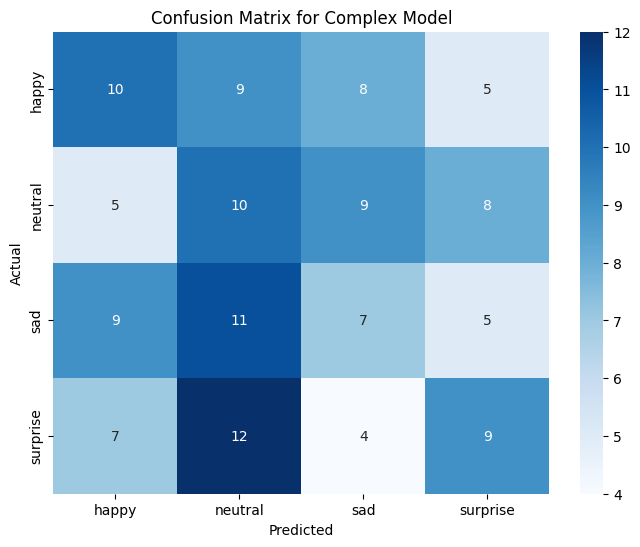

In [ ]:
# Plotting the Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true_complex and y_pred_classes_complex are defined from the previous code

cm = confusion_matrix(y_true_complex, y_pred_classes_complex)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_generator.class_indices.keys()),
            yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Complex Model')
plt.show()

**Observations and Insights:__**<br>
<i>The model is performing better on sad and surprised images than on the happy and neutral.  These results may indicate that the imbalance in the dataset is affecting the efficiency of training.  </i>

## **Conclusion:____________** <br>
<i> The most accurate model that can be used to identify the data is CNN.  The most common problem among models is overfitting.  There seems to be a great deal of noise in the validation data.  These issues may be from the imbalance in the original dataset.  To improve the results, a balanced data set can be used, especially one that does not over represent the minority data.    </i>

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?